In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

class Backpropagation():
    """
    Backpropagation class for 1-S1-1 neural networks
    """
    
    def __init__(self, neurons):
        # Initializing Weights and Biases
        self.neurons = neurons
        self.weights1 = np.random.uniform(-0.5, 0.5, size=(self.neurons, 1))
        self.weights2 = np.random.uniform(-0.5, 0.5, size=(1, self.neurons))
        self.bias1 = np.random.uniform(-0.5, 0.5, size=(self.neurons, 1))
        self.bias2 = np.random.uniform(-0.5, 0.5, size=(1,1))
        
        # For squared error
        self.error = []
        self.iter = []
    
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def predict(self, input):
        # First layer
        sum = np.dot(input, self.weights1) + self.bias1
        self.output1 = self.sigmoid(sum)
        # Second layer
        output = np.dot(self.weights2, self.output1) + self.bias2
        return output
    
    def fit(self, inputs, targets, alpha=0.1, epochs=5000):
        for epoch in range(epochs):
            sse = []
            for input, target in zip(inputs, targets):
                # Calculating output
                output = self.predict(input)
                sig_deriv = (1-self.output1)*self.output1
                
                # Calculating error
                error = target - output
                sse.append(error[0, 0]**2)
                
                # Calculating sensitivites
                s2 = -2 * error
                s1 = (sig_deriv * self.weights2.T) * s2
                # s1 = (np.dot(s2, self.weights2)) * sig_deriv
                
                # Weight Updates
                # update = alpha * s2 * self.output1
                self.weights2 -= alpha * s2 * self.output1.T
                self.weights1 -= alpha * s1 * input
                # Bias updates
                self.bias2 -= alpha * s2
                self.bias1 -= alpha * s1

            epoch_error = sum(sse) / len(inputs)
            self.error.append(epoch_error)
            self.iter.append(epoch)
            
        return self

[[-0.79237148]
 [-3.56180385]
 [-0.59722201]
 [-0.62906241]
 [-5.19628754]
 [-3.90973275]
 [-2.43164486]
 [-0.70526959]
 [-0.75391272]
 [-3.29085814]] [[-1.56276443  1.35253723 -1.15209596 -1.22541218 -3.30185813  2.09889057
   1.81240932 -1.37218087 -1.48730755  2.24636079]]


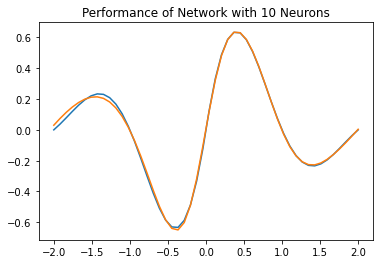

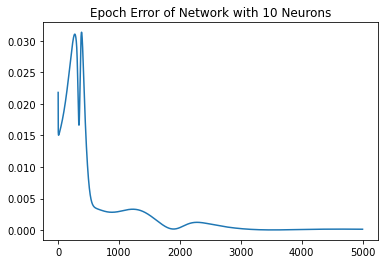

In [2]:
# Getting inputs and targets for training
inputs = np.linspace(-2, 2, 50)
targets = [np.exp(-abs(x)) * np.sin(np.pi*x) for x in inputs]

# Training the network on the inputs
backpropagation = Backpropagation(neurons=10)
backpropagation.fit(inputs, targets)
print(backpropagation.weights1, backpropagation.weights2)

# Predicting
# outputs = [backpropagation.predict(input) for input in inputs]
outputs = []
for input in inputs:
    output = backpropagation.predict(input)
    outputs.append(output[0, 0])

plt.plot(inputs, targets)
plt.plot(inputs, outputs)
plt.title("Performance of Network with 10 Neurons")
plt.show()

plt.plot(backpropagation.iter, backpropagation.error)
plt.title("Epoch Error of Network with 10 Neurons")
plt.show()

[[-5.77758633]
 [-3.21261811]] [[-5.54027825  5.82040986]]


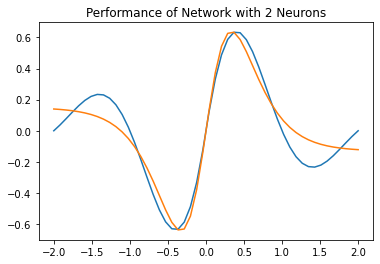

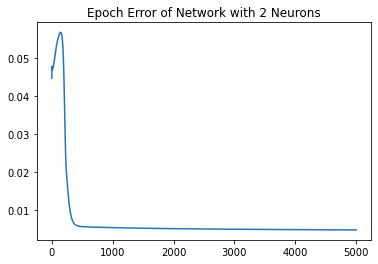

In [3]:
# Repeating process with two neurons in the hidden layer
# Training the network on the inputs
backpropagation = Backpropagation(neurons=2) # Two neurons reduces the complexity, ends up having more error than a network with 10 neurons
backpropagation.fit(inputs, targets)
print(backpropagation.weights1, backpropagation.weights2)

# Predicting
# outputs = [backpropagation.predict(input) for input in inputs]
outputs = []
for input in inputs:
    output = backpropagation.predict(input)
    outputs.append(output[0, 0])

plt.plot(inputs, targets)
plt.plot(inputs, outputs)
plt.title("Performance of Network with 2 Neurons")
plt.show()

plt.plot(backpropagation.iter, backpropagation.error)
plt.title("Epoch Error of Network with 2 Neurons")
plt.show()